## Building The Model
-----

### Setup:
---

In [155]:
# Import dependencies
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [156]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
# Import the Combined Data from /Wrangling_Data_Exports

# For PC
# wrangled_df = pd.read_csv("Wrangling_Data_Exports/Wrangled_Data.csv", index_col=0)

# For Colab
wrangled_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wrangling_Data_Exports/Wrangled_Data.csv", index_col=0)

# Display Dataframe
wrangled_df.head(5)

,Year,Month,Day,Time (EST),Season Week,Venue,City,State,Weather Condition,Temperature (F),...,Home Team Pre-Game Season W/L Ratio,Home Team Pre-Game Season Avg Points For,Home Team Pre-Game Season Avg Points Against,Outcome,Away Team,Away Team Pre-Game Season W Streak,Away Team Pre-Game Season L Streak,Away Team Pre-Game Season W/L Ratio,Away Team Pre-Game Season Avg Points For,Away Team Pre-Game Season Avg Points Against
0,2022.0,September,25,51900.0,3.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,...,0.50,25.00,33.50,2.0,Los Angeles Rams,1.0,0.0,0.50,20.50,29.00
1,2022.0,November,6,57900.0,9.0,State Farm Stadium,Glendale,Arizona,Sunny,76.0,...,0.38,22.75,26.25,2.0,Seattle Seahawks,3.0,0.0,0.62,26.25,24.88
2,2022.0,November,27,57900.0,12.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,...,0.36,21.82,26.91,2.0,Los Angeles Chargers,0.0,2.0,0.50,22.70,25.80
3,2022.0,December,12,72900.0,14.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,...,0.33,22.00,26.75,2.0,New England Patriots,0.0,2.0,0.50,20.75,18.83
4,2022.0,December,25,73200.0,16.0,State Farm Stadium,Glendale,Arizona,Fair,69.0,...,0.29,20.86,26.57,2.0,Tampa Bay Buccaneers,0.0,2.0,0.43,17.64,20.57


### Prepare the Features and Target Arrays:
---

In [158]:
# Create Target Array
targets= wrangled_df["Outcome"].astype(int).values

# Display Array
targets

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [159]:
# Create Features Dataframe
features_df = wrangled_df.drop(columns=["Outcome"])
features_df = features_df.drop(columns=["Year"])
features_df = features_df.drop(columns=["Day"])

# Test Dropping More Features
#features_df = features_df.drop(columns=["Weather Condition"])

features_df.head(5)

,Month,Time (EST),Season Week,Venue,City,State,Weather Condition,Temperature (F),Home Team,Home Team Pre-Game Season W Streak,Home Team Pre-Game Season L Streak,Home Team Pre-Game Season W/L Ratio,Home Team Pre-Game Season Avg Points For,Home Team Pre-Game Season Avg Points Against,Away Team,Away Team Pre-Game Season W Streak,Away Team Pre-Game Season L Streak,Away Team Pre-Game Season W/L Ratio,Away Team Pre-Game Season Avg Points For,Away Team Pre-Game Season Avg Points Against
0,September,51900.0,3.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,Arizona Cardinals,1.0,0.0,0.50,25.00,33.50,Los Angeles Rams,1.0,0.0,0.50,20.50,29.00
1,November,57900.0,9.0,State Farm Stadium,Glendale,Arizona,Sunny,76.0,Arizona Cardinals,0.0,1.0,0.38,22.75,26.25,Seattle Seahawks,3.0,0.0,0.62,26.25,24.88
2,November,57900.0,12.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,Arizona Cardinals,0.0,1.0,0.36,21.82,26.91,Los Angeles Chargers,0.0,2.0,0.50,22.70,25.80
3,December,72900.0,14.0,State Farm Stadium,Glendale,Arizona,None-Enclosed,72.0,Arizona Cardinals,0.0,2.0,0.33,22.00,26.75,New England Patriots,0.0,2.0,0.50,20.75,18.83
4,December,73200.0,16.0,State Farm Stadium,Glendale,Arizona,Fair,69.0,Arizona Cardinals,0.0,4.0,0.29,20.86,26.57,Tampa Bay Buccaneers,0.0,2.0,0.43,17.64,20.57


In [160]:
# Display Weather Condition Options (Now Parsed Down)
features_df["Weather Condition"].value_counts()

None-Enclosed    63
Mostly cloudy    52
Sunny            43
Fair             20
Partly cloudy    16
Raining           8
Showers           3
Cold              1
Name: Weather Condition, dtype: int64

In [161]:
# Git Dummies
dummies_features_df = pd.get_dummies(features_df)

# Display Dataframe
dummies_features_df.columns

Index(['Time (EST)', 'Season Week', 'Temperature (F)',
       'Home Team Pre-Game Season W Streak',
       'Home Team Pre-Game Season L Streak',
       'Home Team Pre-Game Season W/L Ratio',
       'Home Team Pre-Game Season Avg Points For',
       'Home Team Pre-Game Season Avg Points Against',
       'Away Team Pre-Game Season W Streak',
       'Away Team Pre-Game Season L Streak',
       ...
       'Away Team_New Orleans Saints', 'Away Team_New York Giants',
       'Away Team_New York Jets', 'Away Team_Philadelphia Eagles',
       'Away Team_Pittsburgh Steelers', 'Away Team_San Francisco 49ers',
       'Away Team_Seattle Seahawks', 'Away Team_Tampa Bay Buccaneers',
       'Away Team_Tennessee Titans', 'Away Team_Washington Commanders'],
      dtype='object', length=176)

In [162]:
# Grab Dummies Column Names
dummies_columns_array =[]

for column in dummies_features_df.columns:
  dummies_columns_array.append(column)


In [163]:
# Export List of Columns for the Dummies Dataframe
with open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/Features_Names.txt","w") as outfile:
  outfile.write(f'{dummies_columns_array}')

In [164]:
# Create an Array from the Features Dataframe with Dummies
features = dummies_features_df.values

features

array([[5.19e+04, 3.00e+00, 7.20e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.79e+04, 9.00e+00, 7.60e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.79e+04, 1.20e+01, 7.20e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [4.68e+04, 1.20e+01, 4.90e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.68e+04, 1.70e+01, 6.20e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.91e+04, 1.80e+01, 4.20e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [165]:
# Train/Test Split The Data
X_train, X_test, y_train, y_test = train_test_split(features,targets,test_size=.15,random_state=1)

In [166]:
# See How Big Test Set Is
print(f'The number of games for training the model is {len(y_train)}')
print(f'The number of games for testing the model is {len(y_test)}')

The number of games for training the model is 187
The number of games for testing the model is 33


In [167]:
# Scale the Data

# Create a Scaler
scaler = StandardScaler()

# Fit the StandardScaler
features_scaler = scaler.fit(X_train)

# Scale the Features
scaled_X_train = features_scaler.transform(X_train)
scaled_X_test = features_scaler.transform(X_test)

scaled_X_train

array([[-0.56748212,  1.1300761 , -1.15425038, ..., -0.18206914,
        -0.18206914, -0.16574839],
       [-0.91974488, -0.94914263, -0.0440047 , ..., -0.18206914,
         5.49241902, -0.16574839],
       [-0.91974488, -1.51620228,  0.34784671, ..., -0.18206914,
        -0.18206914, -0.16574839],
       ...,
       [ 0.28381955, -0.94914263,  0.151921  , ..., -0.18206914,
        -0.18206914, -0.16574839],
       [ 2.01577813,  0.56301645,  0.54377242, ..., -0.18206914,
        -0.18206914, -0.16574839],
       [ 1.63416014, -0.94914263, -0.17462184, ..., -0.18206914,
        -0.18206914, -0.16574839]])

### Prepare the PCA Model:
---

In [168]:
# Create Primary Component Analysis Model With 95% Explainability
pca_model=PCA(n_components=0.95)

In [169]:
# FIt PCA Model
pca_model = pca_model.fit(scaled_X_train)

pca_X_train = pca_model.transform(scaled_X_train)
pca_X_test = pca_model.transform(scaled_X_test)

pca_X_train

array([[ 1.4845866 ,  1.57351621, -4.02467141, ...,  0.39463886,
        -0.12741653, -0.32939098],
       [ 0.52486618, -0.48979826, -1.11457965, ...,  0.34690848,
        -0.21284079, -0.10143641],
       [19.20023297, 12.05892854, 15.74474025, ..., -0.04944191,
         0.15344555, -0.30397189],
       ...,
       [-0.58072905,  1.93844872, -1.10247244, ...,  0.08900281,
        -0.06177361, -0.88424141],
       [-0.51076094, -2.28327804,  3.88831548, ...,  0.91693136,
        -0.4707284 , -1.333826  ],
       [-1.52533178,  2.26725161,  0.84470186, ..., -0.23093688,
         0.55313069, -0.07927289]])

In [170]:
# Check Number of PCA Features
pca_features_count = len(pca_X_train[0])

print(f'PCA Features: {pca_features_count}')

PCA Features: 61


### Prepare the Logistic Regression Model With Scaled Data:
---

In [171]:
# Create the Model
scaled_log_reg_model = LogisticRegression(max_iter=500)

scaled_log_reg_model.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=500)

In [172]:
# Check Training and Testing Scores
print(f'Training Score: {scaled_log_reg_model.score(scaled_X_train, y_train)}')
print(f'Testing Score: {scaled_log_reg_model.score(scaled_X_test, y_test)}')

Training Score: 0.9037433155080213
Testing Score: 0.696969696969697


### Prepare the Logistic Regression Model With Scaled PCA Data:
---

In [173]:
# Create the Model
pca_log_reg_model = LogisticRegression(max_iter=500)

pca_log_reg_model.fit(pca_X_train,y_train)

LogisticRegression(max_iter=500)

In [174]:
# Check Training and Testing Scores
print(f'Training Score: {pca_log_reg_model.score(pca_X_train, y_train)}')
print(f'Testing Score: {pca_log_reg_model.score(pca_X_test, y_test)}')

Training Score: 0.7540106951871658
Testing Score: 0.5454545454545454


### Prepare the Random Forest Model With Scaled Data:
---

In [175]:
# Create The Random Forest Model
scaled_rf_model = RandomForestClassifier(random_state=1, n_estimators=1000).fit(scaled_X_train, y_train)

In [176]:
# Check Training and Testing Scores
print(f'Training Score: {scaled_rf_model.score(scaled_X_train, y_train)}')
print(f'Testing Score: {scaled_rf_model.score(scaled_X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6666666666666666


### Prepare the Random Forest Model with Scaled PCA Data:
---

In [177]:
# Create The Random Forest Model
pca_rf_model = RandomForestClassifier(random_state=1, n_estimators=1000).fit(pca_X_train, y_train)

In [178]:
# Check Training and Testing Scores
print(f'Training Score: {pca_rf_model.score(pca_X_train, y_train)}')
print(f'Testing Score: {pca_rf_model.score(pca_X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.696969696969697


### Prepare the KNN Model With Scaled Data:
---

k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.738/0.758
k: 5, Train/Test Score: 0.727/0.667
k: 7, Train/Test Score: 0.636/0.636
k: 9, Train/Test Score: 0.642/0.727
k: 11, Train/Test Score: 0.620/0.697
k: 13, Train/Test Score: 0.631/0.697
k: 15, Train/Test Score: 0.583/0.727
k: 17, Train/Test Score: 0.604/0.606
k: 19, Train/Test Score: 0.615/0.606
k: 21, Train/Test Score: 0.620/0.606
k: 23, Train/Test Score: 0.610/0.636


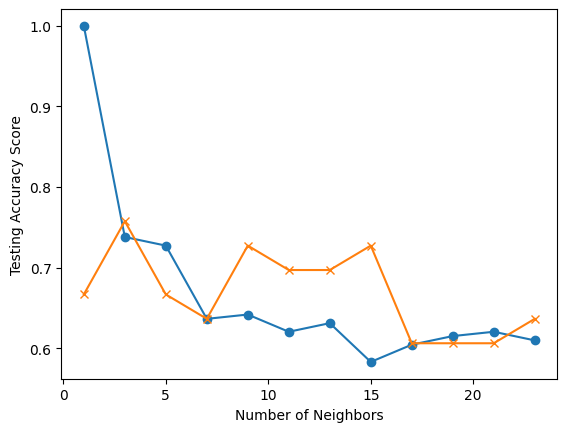

In [179]:
# Check for K-Value with The Heighest Accuracy
training_data_scores = []
testing_data_scores = []

for k in range(1, 25, 2):

    scaled_knn_model = KNeighborsClassifier(n_neighbors=k)
    scaled_knn_model.fit(scaled_X_train, y_train)

    train_score = scaled_knn_model.score(scaled_X_train, y_train)
    test_score = scaled_knn_model.score(scaled_X_test, y_test)

    training_data_scores.append(train_score)
    testing_data_scores.append(test_score)

    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 25, 2), training_data_scores, marker='o')
plt.plot(range(1, 25, 2), testing_data_scores, marker="x")
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [180]:
# Create KNN Model
scaled_knn_model = KNeighborsClassifier(n_neighbors=3)

scaled_knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
# Check Training and Testing Scores
print(f'Training Score: {scaled_knn_model.score(scaled_X_train, y_train)}')
print(f'Testing Score: {scaled_knn_model.score(scaled_X_test, y_test)}')

Training Score: 0.7379679144385026
Testing Score: 0.7575757575757576


### Prepare the KNN Model With Scaled PCA Data:
---

k: 1, Train/Test Score: 1.000/0.636
k: 3, Train/Test Score: 0.722/0.727
k: 5, Train/Test Score: 0.695/0.636
k: 7, Train/Test Score: 0.626/0.667
k: 9, Train/Test Score: 0.642/0.636
k: 11, Train/Test Score: 0.626/0.667
k: 13, Train/Test Score: 0.626/0.606
k: 15, Train/Test Score: 0.578/0.606
k: 17, Train/Test Score: 0.578/0.636
k: 19, Train/Test Score: 0.599/0.667
k: 21, Train/Test Score: 0.626/0.606
k: 23, Train/Test Score: 0.615/0.636


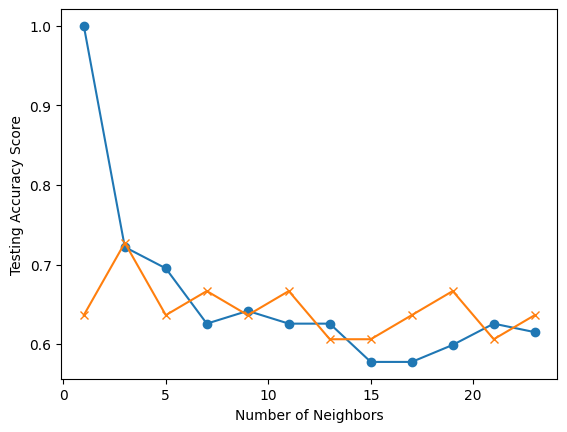

In [182]:
# Check for K-Value with The Heighest Accuracy
training_data_scores = []
testing_data_scores = []

for k in range(1, 25, 2):

    pca_knn_model = KNeighborsClassifier(n_neighbors=k)
    pca_knn_model.fit(pca_X_train, y_train)

    train_score = pca_knn_model.score(pca_X_train, y_train)
    test_score = pca_knn_model.score(pca_X_test, y_test)

    training_data_scores.append(train_score)
    testing_data_scores.append(test_score)

    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 25, 2), training_data_scores, marker='o')
plt.plot(range(1, 25, 2), testing_data_scores, marker="x")
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [183]:
# Create KNN Model
pca_knn_model = KNeighborsClassifier(n_neighbors=3)

pca_knn_model.fit(pca_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [184]:
# Check Training and Testing Scores
print(f'Training Score: {pca_knn_model.score(pca_X_train, y_train)}')
print(f'Testing Score: {pca_knn_model.score(pca_X_test, y_test)}')

Training Score: 0.7219251336898396
Testing Score: 0.7272727272727273


### Prepare the Nural Network Model With Scaled Data:
---

In [185]:
# Count features
features_count = len(scaled_X_train[0])
print(f'Total Features: {features_count}')

Total Features: 176


In [186]:
# Define Nural Network Model

scaled_nn = tf.keras.models.Sequential()

# Input layer
scaled_nn.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=features_count))

# Second layer
scaled_nn.add(tf.keras.layers.Dense(units=2, activation="relu"))

# Output layer
scaled_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
scaled_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 708       
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
# Compile the model
scaled_nn.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [188]:
# Train the model
scaled_nn.fit(scaled_X_train, y_train, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.6446 - accuracy: 0.4866
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.5615
Epoch 3/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.5615
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.5615
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5676 - accuracy: 0.5615
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.5615
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.5615
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5615
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.5615
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.5615
Epoch 11/150
6/6 [===========

In [189]:
# Evaluate the model using the test data
model_loss, model_accuracy = scaled_nn.evaluate(scaled_X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -7.4435e+01 - accuracy: 0.5758 - 105ms/epoch - 53ms/step
Loss: -74.43547058105469, Accuracy: 0.5757575631141663


### Prepare the Nural Network Model With Scaled PCA Data:
---

In [190]:
# Count features
features_count = len(pca_X_train[0])
print(f'Total Features: {features_count}')

Total Features: 61


In [191]:
# Define Nural Network Model

pca_nn = tf.keras.models.Sequential()

# Input layer
pca_nn.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=features_count))

# Second layer
pca_nn.add(tf.keras.layers.Dense(units=2, activation="relu"))

# Output layer
pca_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
pca_nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 248       
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
# Compile the model
pca_nn.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [193]:
# Train the model
pca_nn.fit(pca_X_train, y_train, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 2ms/step - loss: -0.3576 - accuracy: 0.5615
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: -0.4229 - accuracy: 0.5615
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: -0.4823 - accuracy: 0.5615
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: -0.5451 - accuracy: 0.5615
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: -0.6070 - accuracy: 0.5615
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: -0.6699 - accuracy: 0.5615
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: -0.7351 - accuracy: 0.5615
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: -0.7978 - accuracy: 0.5615
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: -0.8633 - accuracy: 0.5615
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: -0.9318 - accuracy: 0.5615
Epoch 11/150
6/6 [=

In [194]:
# Evaluate the model using the test data
model_loss, model_accuracy = pca_nn.evaluate(pca_X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -7.2440e+01 - accuracy: 0.5758 - 125ms/epoch - 62ms/step
Loss: -72.43968963623047, Accuracy: 0.5757575631141663


### Export the Trained Models We Will Use:
---

In [195]:
# Export the Trained Models
import pickle

with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaler_model","wb") as f:
  pickle.dump(features_scaler,f)

# The best model did not use PCA
#with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/pca_model","wb") as f:
  #pickle.dump(pca_model,f)

with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaled_knn_model","wb") as f:
  pickle.dump(scaled_knn_model,f)


### Test Importing the Trained Models We Will Use for a Prediction:
---

In [196]:
# Imports Needed if Replicating
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [197]:
# Test Importing Trained Models

test_scaler = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaler_model","rb"))

# The best model did not use PCA
#test_pca = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/pca_model","rb"))

test_rf = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaled_knn_model","rb"))

In [198]:
# Grab a Game to Use as an Example
test_game = dummies_features_df[(dummies_features_df["Season Week"]==3.0)].head(1)

test_game

,Time (EST),Season Week,Temperature (F),Home Team Pre-Game Season W Streak,Home Team Pre-Game Season L Streak,Home Team Pre-Game Season W/L Ratio,Home Team Pre-Game Season Avg Points For,Home Team Pre-Game Season Avg Points Against,Away Team Pre-Game Season W Streak,Away Team Pre-Game Season L Streak,...,Away Team_New Orleans Saints,Away Team_New York Giants,Away Team_New York Jets,Away Team_Philadelphia Eagles,Away Team_Pittsburgh Steelers,Away Team_San Francisco 49ers,Away Team_Seattle Seahawks,Away Team_Tampa Bay Buccaneers,Away Team_Tennessee Titans,Away Team_Washington Commanders
0,51900.0,3.0,72.0,1.0,0.0,0.5,25.0,33.5,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# Get a Features Array for Test Game
test_features_array = test_game.values

In [200]:
# Scale Using Scaler Model
test_scaled_features = test_scaler.transform(test_features_array)

In [201]:
# The best model did not use PCA
# Run PCA Using PCA Model
#test_pca_features = test_pca.transform(test_scaled_features)

In [202]:
# Get a Prediction Using Random Forest Model
test_rf.predict(test_scaled_features)

array([2])